### **Libraries**

In [1]:
import numpy as np
from numpy import *
from math import pi
import matplotlib as mpl
from matplotlib import animation
from matplotlib import pyplot as plt
from time import sleep
from IPython.display import clear_output

### **Formating**

In [2]:
mpl.rcParams['axes.linewidth'] = 1 #set the value globally
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1

mpl.rcParams['font.family'] = 'sans-serif'


mpl.rcParams.update({'font.size': 16}) #Change function call

### **Relevant Functions**

In [3]:
def cenDiff(x,y): #4th order central difference stencil method
    
    if size(x) != size(y): #Check for simmilar size between x and y
        print("x and y not the same size!")
        return
    
    nx = size(x) #Get the number of x values
    dydx = zeros(nx) #Create an array of 0's with a simmilar size to x as stored in nx
    h = 0.001
    
    dydx[0] = (((-3*y[0]) + (4*y[1]) + (-1*y[2])) / (2*h)) / (((-3*x[0]) + (4*x[1]) + (-1*x[2])) / (2*h))
    dydx[1] = (((-3*y[0+1]) + (4*y[1+1]) + (-1*y[2+1])) / (2*h)) / (((-3*x[0+1]) + (4*x[1+1]) + (-1*x[2+1])) / (2*h))
    
    for i in range(2,nx-2):
        dydx[i] = (((y[i-2]) - (8*y[i-1]) + (8*y[i+1]) - (y[i+2])) / (12*h)) / (((x[i-2]) - (8*x[i-1]) + (8*x[i+1]) - (x[i+2])) / (12*h))
    
    dydx[-1] = (((3*y[nx-1]) + (-4*y[nx-2]) + (y[nx-3])) / (2*h)) / (((3*x[nx-1]) + (-4*x[nx-2]) + (x[nx-3])) / (2*h))
    dydx[-2] = (((3*y[nx-1-1]) + (-4*y[nx-2-1]) + (y[nx-3-1])) / (2*h)) / (((3*x[nx-1-1]) + (-4*x[nx-2-1]) + (x[nx-3-1])) / (2*h))
    
    return dydx #Return the dydx list

def dataLoad(path, filename, col1): #Load data, from (path+filename) pull from (col1) columns
    time = loadtxt(path+"/"+filename, usecols=(0), unpack=True)
    outData = loadtxt(path+"/"+filename, usecols=(col1[0], col1[1], col1[2]), unpack=True)
    return(time, outData) #Return (time) and (outData), as an array

def getData2D(time, QzzDat, theta=[np.pi/2], derivType=0):
    #[/] What does this function do?
    #Load in data from a given file, using two coloumns (0,col1).
    #Run it through an equation to extract the gravitational wave (GW) signal.
    #Return GW signal and time as h, t respectively

    #t, Qzz = loadtxt(filename, usecols=(0,col1), unpack=True) #Load in data (0,col1) from file 
    QddotZZ = cenDiff(time,QzzDat) #Get the dy/dx (dQzz/dt) values for the data 
    
    #[/] Want Newton's constant divided by the speed of light to the fourth power: G/c^4 [in cgs units]
    Gc4 = (6.674E-8) / (2.997E10)**4  
    
    #[/] Want 10 Kilaparsecs converted to cm
    distance = 10 * (3.085677E21) 
    
    if derivType == 0:
        #[/] Want Equation (3) from this paper (ignore the sin^2 term for now): https://arxiv.org/pdf/2011.09000.pdf
        h = (3/2) * (Gc4/distance) * QddotZZ 
    
    else:
        hConstants = (3/2) * (Gc4/distance) * (np.sin(theta)**2)
        
        h = np.outer(QddotZZ,hConstants)
        
    return time, h

def get2D(time, fullQzzDat, tbounce=0.0, theta=[np.pi/2], viewAngleYN=0):
    """
    Input:
        path : the path of flash.dat file
        fname: the file name of flash.dat
        tbounce: the bounce time in seconds

    Output:
        time:
        hplus50:
        hplus150:
        hplusInf:
        hplusTot:
    """
    #fn  = path+"/"+fname
    
    #Below you will input column numbers from the .dat files you worked with last week
    
    t1, hplus50  = getData2D(time, fullQzzDat[0], theta, viewAngleYN) #[/] Want the "ddI yy r<50km" column here (be careful of python indexing)
    t1, hplus150 = getData2D(time, fullQzzDat[1], theta, viewAngleYN) #[/] Want the "ddI yy 50<r<150" column here
    t1, hplusInf = getData2D(time, fullQzzDat[2], theta, viewAngleYN) #[/] Want the "ddI yy r>150km" column here
    
    hplusTot = hplus50 + hplus150 + hplusInf

    time = t1 - tbounce

    return time, hplus50, hplus150, hplusInf, hplusTot

In [4]:
#(https://watermark.silverchair.com/128-183.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAs8wggLLBgkqhkiG9w0BBwagggK8MIICuAIBADCCArEGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjTqC-mjavhdU-GTsAgEQgIICghnArifHcDpJA81JGdo5Ef4SO5kENQO57VuQ3g9ElVSiP02pDdeVx4kaCW6p7iwwBOejiFhPXA7kcqWJro4fwwI53B8ayQt5tuyURGzoCzLHEjOdC7pCz_injcByakAI98L8qiSR0GNqKdgwNrK4lQc5S8Oz62DkRK9PHHBazftQwFMHplD6lLy9Eq2fZOxZpkm0cZlP2jB5UoK5jBCvQtPu5ogAh8Q_mkWDvhE1Zl61XZOhUg78_YaURvrF4MbMZGSwy_fMpdrrmJN4hzytaAWBqD0QaKf-kDo2uw2Msx2Z8a7GRO5P1HCqyM7Zysd08LiX8sT5qyfO1I8KnGtS3WDk7C5N1oCyL9dsvZEpRKSysB8ewaRF_d3vNejfXr48bF_8_Ahmznwm_l-21g7jFVFobtoehluIuh6vY5iyG0JNShJHDkDofLAJqoBAJnGdzb16MMg8Yu8L_Crq0_DdkKR915AIZpdEzstSsy7mNsI-_4EXR72zKDF4u0s5pqTBLf7abdF6bq0YQHKqRqvdNtdb-ulTw54kUCyDAu8fY1UmZa6kpuIop-VSrGVsQKTdnD31VUMKQ4SbSjiCA9m5vdpzau8Nsl_axpjQ-9fDFc-ehIq8TRTA-a8zSx84OoT6105dVZ3ioYTpeobMfsj0WrvT5qIUM_kQ0FiwZgmFCPw07JKfXMdH6dd0Mnc_ikN0Ap_aPYVKlSohvtaVE8j-IXFIJ_Id1qVtebvG_JEkz38LGxII7wHsiMo8OUSVSAi4xyB-wdBD_l18OiV9Wa7AIgMpaFVbEnepLrtnGoFXjpOu3swQuOanxqedsbBS6pmv4xtwwtMaBjM53tFFj0HsbFA6aw)
#(https://arxiv.org/pdf/2011.09000.pdf)
def getDataPlusGeneral(filename,theta,phi,col1,col2,col3,col4,col5,col6,CenDiff=True):
    #get h+ in terms of arbitrary angle [M.A.P 4 June'19]
    t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadtxt(filename, usecols=(0,col1,col2,col3,col4,col5,col6), unpack=True)
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
        QddotZZ = cenDiff(t,Qzz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz
        QddotZZ = Qzz
    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10 #constants
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #h+ calculcation (Does this match?  Beware it may use some trig identities)
    h = 1.0*Gc4/distance*(QddotXX*(np.cos(theta)*np.cos(theta)*np.cos(phi)*np.cos(phi)-np.sin(phi)*np.sin(phi))+ \
                          QddotYY*(np.cos(theta)*np.cos(theta)*np.sin(phi)*np.sin(phi)-np.cos(phi)*np.cos(phi))- \
                          QddotXY*(np.cos(theta)*np.cos(theta)+1)*np.sin(2.*phi)+QddotZZ*np.sin(theta)*np.sin(theta)- \
                          (QddotXZ*np.cos(phi) + QddotYZ*np.sin(phi))*np.sin(2*theta))
    ts = t
    return ts, h

def plusGeneral(theta,phi,t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz,CenDiff=True): #No data loading version
    #get h+ in terms of arbitrary angle [M.A.P 4 June'19]
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
        QddotZZ = cenDiff(t,Qzz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz
        QddotZZ = Qzz
    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10 #constants
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #h+ calculcation (Does this match?  Beware it may use some trig identities)
    h = 1.0*Gc4/distance*(QddotXX*(np.cos(theta)*np.cos(theta)*np.cos(phi)*np.cos(phi)-np.sin(phi)*np.sin(phi))+ \
                          QddotYY*(np.cos(theta)*np.cos(theta)*np.sin(phi)*np.sin(phi)-np.cos(phi)*np.cos(phi))- \
                          QddotXY*(np.cos(theta)*np.cos(theta)+1)*np.sin(2.*phi)+QddotZZ*np.sin(theta)*np.sin(theta)- \
                          (QddotXZ*np.cos(phi) + QddotYZ*np.sin(phi))*np.sin(2*theta))
    
    return(h)


def getDataCrossGeneral(filename,theta,phi,col1,col2,col3,col4,col5,CenDiff=True):
    #get hx in terms of arbitrary angle [M.A.P 4 June'19]
    t,Qxx,Qyy,Qxy,Qxz,Qyz = loadtxt(filename, usecols=(0,col1,col2,col3,col4,col5), unpack=True)
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz

    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10
    distance = 10.e3*3.086e18 # [10 kpc]
    
    #hx calculcation (Does this match?  Beware it may use some trig identities)
#     h = 2.0*Gc4/distance*(-0.5*(QddotXX-QddotYY)*np.cos(theta)*np.sin(2.*phi)+ \
#                            1.0*QddotXY*np.cos(theta)*np.cos(2.*phi)+ \
#                            1.0*QddotXZ*np.sin(theta)*np.sin(phi)- \
#                            2.0*QddotYZ*np.sin(theta)*np.cos(phi))
    
    h = 2.0*Gc4/distance*((QddotYY-QddotXX)*np.cos(theta)*np.sin(phi)*np.cos(phi)+ \
                           QddotXY*np.cos(theta)*np.cos(2*phi)+ \
                           QddotXZ*np.sin(theta)*np.sin(phi)- \
                           QddotYZ*np.sin(theta)*np.cos(phi))
    
    ts = t
    return ts, h

def crossGeneral(theta,phi,t,Qxx,Qyy,Qxy,Qxz,Qyz,CenDiff=True): #No data loading version
    #get hx in terms of arbitrary angle [M.A.P 4 June'19]
    #If True, .dat files contain first time derivative of Q, else
    #.dat files contain second time derivative of Q
    if (CenDiff == True):
        QddotXX = cenDiff(t,Qxx)
        QddotYY = cenDiff(t,Qyy)
        QddotXY = cenDiff(t,Qxy)
        QddotXZ = cenDiff(t,Qxz)
        QddotYZ = cenDiff(t,Qyz)
    else:
        QddotXX = Qxx
        QddotYY = Qyy
        QddotXY = Qxy
        QddotXZ = Qxz
        QddotYZ = Qyz

    Gc4 = 6.67e-8/3e10/3e10/3e10/3e10
    distance = 10.e3*3.086e18 # [10 kpc]
    
#     h = 2.0*Gc4/distance*((QddotYY-QddotXX)*np.cos(theta)*np.sin(phi)*np.cos(phi)+ \
#                            QddotXY*np.cos(theta)*np.cos(2*phi)+ \
#                            QddotXZ*np.sin(theta)*np.sin(phi)- \
#                            QddotYZ*np.sin(theta)*np.cos(phi))
    
    h = np.outer(QddotYY-QddotXX,np.cos(theta)*np.sin(phi)*np.cos(phi)) + \
        np.outer(QddotXY,np.cos(theta)*np.cos(2*phi)) + \
        np.outer(QddotXZ,np.sin(theta)*np.sin(phi)) - \
        np.outer(QddotYZ,np.sin(theta)*np.cos(phi))
    
    h *= 2.0*Gc4/distance
    
    h = np.reshape(h,(np.shape(QddotYZ)[0],np.shape(theta[0])[0],np.shape(theta[0])[0]))
    
    return(h)

def get3Dsum(path,fname,theta,phi,tbounce=0,CenDiff=True, P_C=0): #P_C = 0 (use Plus), P_C = 1 (use Cross)
    """
    Return h+ polarization for arbitrary angle (theta,phi)
    See Oohara (1997) eqns (2.9a)-(2.10c)
    theta - altitudinal angle [radians]
    phi   - azimuthal angle  [radians]
    """
    fn  = path+"/"+fname
    #pruneDat(fn) ?
    
    #may want an if statement here and additional argument above to choose between Plus or Cross polarizations
    t1, h  = getDataPlusGeneral(fn,theta,phi, 45, 47, 46, 48, 49, 50, CenDiff) #mesa20 columns
    if (P_C == 1):
        t1, h  = getDataCrossGeneral(fn,theta,phi, 45, 47, 46, 48, 49, CenDiff)#Kuochuan rotating runs
    
    time = t1 - tbounce
    return time, h

### **Import Data**

In [5]:
path = r'C:\Users\crazy\PajkosResearch'

fname_mensa20 = 'mesa20_pert.dat'

viewAngles = np.array([[np.pi/2,0],[0,0],[np.pi/4,np.pi/4]]) #[[theta,phi]]

timeData_Mensa, h_Ang1 = get3Dsum(path, fname_mensa20, viewAngles[0][0], viewAngles[0][1])
timeData_Mensa, h_Ang2 = get3Dsum(path, fname_mensa20, viewAngles[1][0], viewAngles[1][1])
timeData_Mensa, h_Ang3 = get3Dsum(path, fname_mensa20, viewAngles[2][0], viewAngles[2][1])

In [6]:
#viewAngles = np.linspace(0,np.pi,100) #Set up viewing angles

### **Work**

Text(0.5, 0, 'Z-Axis')

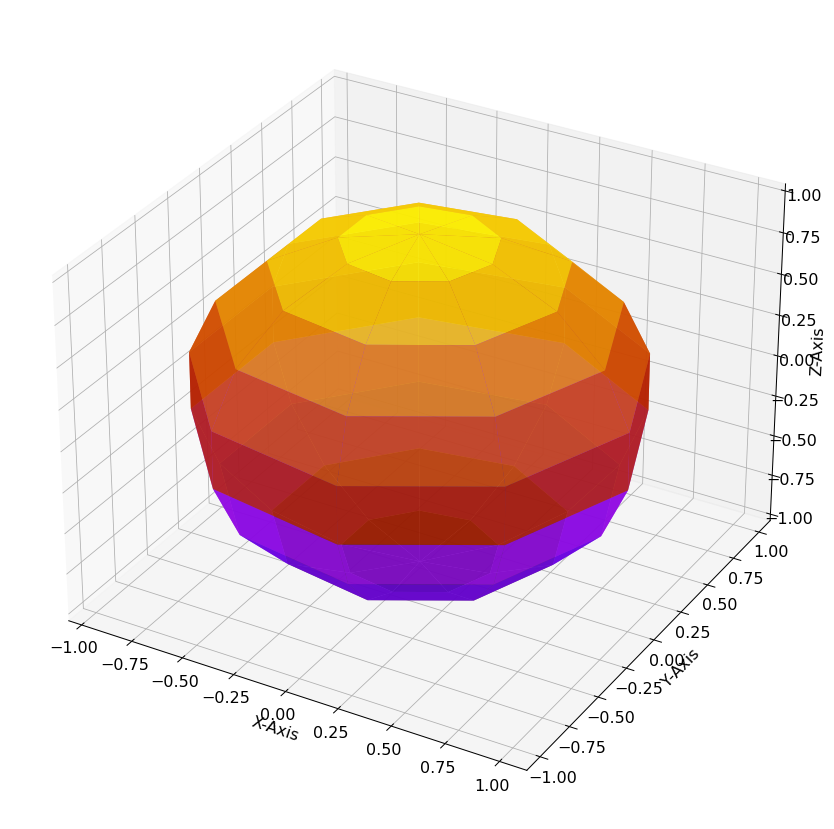

In [7]:
#Initialize and calculate x,y,z components of the surface
sphereR = 1
nVerts = 10j
phi, theta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
xSph = sphereR * np.sin(phi) * np.cos(theta)
ySph = sphereR * np.sin(phi) * np.sin(theta)
zSph = sphereR * cos(phi)

figI = plt.figure(figsize = (15,15)) #Set figure
axSurf = figI.add_subplot(111, projection='3d') #Add subplot and projection type

axSurf.plot_surface(xSph, ySph, zSph, cmap = 'gnuplot', alpha = 0.8)
axSurf.set_xlabel('X-Axis')
axSurf.set_ylabel('Y-Axis')
axSurf.set_zlabel('Z-Axis')

In [8]:
timeData_Mensa[0]

0.01582

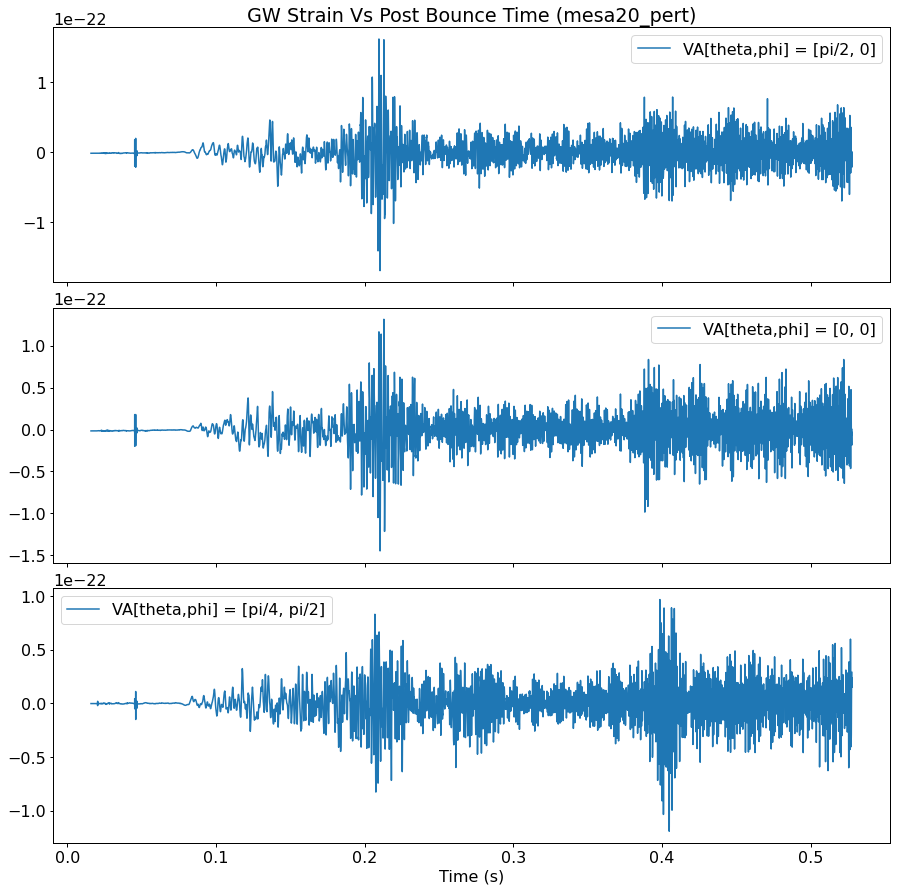

In [9]:
fig, ax1 = plt.subplots(3, sharex=True)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.10)

ax1[0].plot(timeData_Mensa, h_Ang1, label = 'VA[theta,phi] = [pi/2, 0]') #[theta,phi] = [pi/2, 0]
ax1[1].plot(timeData_Mensa, h_Ang2, label = 'VA[theta,phi] = [0, 0]') #[theta,phi] = [0, 0]
ax1[2].plot(timeData_Mensa, h_Ang3, label = 'VA[theta,phi] = [pi/4, pi/2]') #[theta,phi] = [pi/4, pi/2]

ax1[2].set_xlabel('Time (s)')
ax1[0].set_title('GW Strain Vs Post Bounce Time (mesa20_pert)')

ax1[0].legend()
ax1[1].legend()
ax1[2].legend()

In [10]:
def loadDatQ(path, fname, colFull):
    fileName  = path+"/"+fname
    
    t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadtxt(fileName, usecols = (colFull), unpack=True)
    
    return(t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz)

In [11]:
def cenDiffFront(x,y): #1st and 2nd 4th order central difference 
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((-3*y[0]) + (4*y[1]) + (-1*y[2])) / (2*h)) / (((-3*x[0]) + (4*x[1]) + (-1*x[2])) / (2*h))
    return(dydx)

def cenDiffMid(x,y): #Inbetweens 4th order central difference
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((y[-2]) - (8*y[-1]) + (8*y[1]) - (y[2])) / (12*h)) / (((x[-2]) - (8*x[-1]) + (8*x[1]) - (x[2])) / (12*h))
    return(dydx)

def cenDiffBack(x,y): #last and 2nd to last 4th order central difference
    nx = size(x) #Get the number of x values
    h = 0.001
    
    dydx = (((3*y[nx-1]) + (-4*y[nx-2]) + (y[nx-3])) / (2*h)) / (((3*x[nx-1]) + (-4*x[nx-2]) + (x[nx-3])) / (2*h))
    return(dydx)

In [12]:
def strain3DSurf(time = 1000, timeRange = np.arange(0,10000), nVerts = 10j, fig = plt.figure(figsize = (15,15))):
    #time: index position
    #timeRange: range to iterate over
    #nVerts: number of vertices to create for the 3d surface
    
    #theta - altitudinal angle [radians]
    #phi   - azimuthal angle  [radians]
    phi, theta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
    hValsR = np.zeros_like(phi) #Initialize an array of shape and size simmilar to phi
    
    for i in range(np.shape(phi)[0]):
        for j in range(np.shape(phi)[0]):
            #h calculation at each point(phi, theta) store as array simmilar to phi or theta
            if time == timeRange[0]:
                QddotXX = cenDiffFront(t[time:time+3],Qxx[time:time+3])
                QddotYY = cenDiffFront(t[time:time+3],Qyy[time:time+3])
                QddotXY = cenDiffFront(t[time:time+3],Qxy[time:time+3])
                QddotXZ = cenDiffFront(t[time:time+3],Qxz[time:time+3])
                QddotYZ = cenDiffFront(t[time:time+3],Qyz[time:time+3])
                
                hValsR[i,j] = crossGeneral(theta[i,j],phi[i,j],t,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
            
            elif time == timeRange[1]:
                QddotXX = cenDiffFront(t[time:time+3],Qxx[time:time+3])
                QddotYY = cenDiffFront(t[time:time+3],Qyy[time:time+3])
                QddotXY = cenDiffFront(t[time:time+3],Qxy[time:time+3])
                QddotXZ = cenDiffFront(t[time:time+3],Qxz[time:time+3])
                QddotYZ = cenDiffFront(t[time:time+3],Qyz[time:time+3])
                
                hValsR[i,j] = crossGeneral(theta[i,j],phi[i,j],t,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
                
            elif time == timeRange[-1]:
                QddotXX = cenDiffBack(t[time-3:time],Qxx[time-3:time])
                QddotYY = cenDiffBack(t[time-3:time],Qyy[time-3:time])
                QddotXY = cenDiffBack(t[time-3:time],Qxy[time-3:time])
                QddotXZ = cenDiffBack(t[time-3:time],Qxz[time-3:time])
                QddotYZ = cenDiffBack(t[time-3:time],Qyz[time-3:time])
                
                hValsR[i,j] = crossGeneral(theta[i,j],phi[i,j],t,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
                
            elif time == timeRange[-2]:
                QddotXX = cenDiffBack(t[time-3:time],Qxx[time-3:time])
                QddotYY = cenDiffBack(t[time-3:time],Qyy[time-3:time])
                QddotXY = cenDiffBack(t[time-3:time],Qxy[time-3:time])
                QddotXZ = cenDiffBack(t[time-3:time],Qxz[time-3:time])
                QddotYZ = cenDiffBack(t[time-3:time],Qyz[time-3:time])
                
                hValsR[i,j] = crossGeneral(theta[i,j],phi[i,j],t,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
                
            else:
                QddotXX = cenDiffMid(t[time-2:time+2],Qxx[time-2:time+2])
                QddotYY = cenDiffMid(t[time-2:time+2],Qyy[time-2:time+2])
                QddotXY = cenDiffMid(t[time-2:time+2],Qxy[time-2:time+2])
                QddotXZ = cenDiffMid(t[time-2:time+2],Qxz[time-2:time+2])
                QddotYZ = cenDiffMid(t[time-2:time+2],Qyz[time-2:time+2])
                
                hValsR[i,j] = crossGeneral(theta[i,j],phi[i,j],t,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)
    
    xSph = hValsR * np.sin(theta) * np.cos(phi)
    ySph = hValsR * np.sin(theta) * np.sin(phi)
    zSph = hValsR * np.cos(theta) 

    axes3Dlim = 0.5e-22
    
    ax3DSurf = fig.add_subplot(2,1,2, projection='3d') #Add subplot of projection type 3d
    
    ax3DSurf.set_xlim(-axes3Dlim,axes3Dlim)
    ax3DSurf.set_ylim(-axes3Dlim,axes3Dlim)
    ax3DSurf.set_zlim(-axes3Dlim,axes3Dlim)
    
    ax3DSurf.plot_surface(xSph, ySph, zSph, color = 'cyan', alpha = 1)
    
    ax3DSurf.set_xlabel('X')
    ax3DSurf.set_ylabel('Y')
    ax3DSurf.set_zlabel('Z')
    
    ax3DSurf.axis('on')

    return(fig)
    
def animationStrain3DSurf(path, prefix, iterRange = np.arange(0,1000,10), nVerts = 25j):
    count = 0
    ScalePltLim = 2e-21
    
    for i in range(len(iterRange)):
        figTemp = plt.figure(figsize = (15,15))
        
        axIter = figTemp.add_subplot(2,1,1)
        
        axIter.set_xlim(timeData_Mensa[0],timeData_Mensa[-1])
        axIter.set_ylim(h_Ang1[0],h_Ang1[-1]) 
        
        #axIter.plot(timeData_Mensa, h_Ang1)
        axIter.axvline(t[iterRange[i]])
        
        axTemp = strain3DSurf(time = iterRange[i], timeRange = iterRange, nVerts = nVerts, fig = figTemp)
        
        i_str = str(count)
        suffix = i_str.rjust(4,'0')
        figTemp.savefig(path + prefix + suffix + '.jpeg')
        plt.clf()
        count += 1
        
        if i == 0:
            figTemp = plt.figure(figsize = (15,15))
            
            axIter = figTemp.add_subplot(2,1,1) #Time domain wave form
            
            axIter.plot(timeData_Mensa, h_Ang1)
            axIter.set_title('Time Domain Wave Form ([theta,phi] = [pi/2, 0])')
            axIter.set_xlabel('Time')
            axIter.set_ylabel('$h_x$')
            axIter.axis('off')
            
#             ax3DSurf = figTemp.add_subplot(2,1,2, projection='3d') #Add subplot of projection type 3d
            
#             axes3Dlim = 1e-23
#             ax3DSurf.set_xlim(-axes3Dlim,axes3Dlim)
#             ax3DSurf.set_ylim(-axes3Dlim,axes3Dlim)
#             ax3DSurf.set_zlim(-axes3Dlim,axes3Dlim)
            
#             temp = np.zeros([2,2])
            
#             ax3DSurf.plot_surface(temp,temp,temp)
#             ax3DSurf.axis('on') 
            
            figTemp.savefig(path + prefix + 'axes' + '.png', transparent=True)
            plt.clf()
        
    return()

<Figure size 1080x1080 with 0 Axes>

In [13]:
path = r'C:\Users\crazy\PajkosResearch'

fname_mensa20 = 'mesa20_pert.dat'

colUse = [0, 45, 47, 46, 48, 49, 50]

t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fname_mensa20, colUse)

In [14]:
#fig3D = plt.figure(figsize = (15,15))
#ax3DSurf = strain3DSurf(time = 13000, timeRange = np.arange(0,20000), nVerts = 25j, fig = fig3D)
#fig3D.savefig('testOmega.jpeg')

prefix = '3DSurfTest'
path = 'Animat3DStore/'

#animationStrain3DSurf(path, prefix, iterRange = np.arange(0,100,25))

#ffmpeg -i 3DSurfTest%04d.jpeg 3DLongMovie.mp4
#ffmpeg -i 3DLongMovie.mp4 -i 3DSurfTestaxes.png -filter_complex overlay=0:0 3DFullLongMovie.mp4

In [15]:
# nVerts0 = 5j #Ensure j is present
# timeInitital = 0
# timeEnd = 100
# timeStep = 2 #Ensure timeEnd%timeStep = 0

# if timeEnd%timeStep != 0:
#     print('Check timeEnd, timeStep')

# phiTheta0 = np.mgrid[0:np.pi:nVerts0, 0:2*np.pi:nVerts0]
# #vecArray = np.full((int(timeEnd/timeStep),2,5,5), phiTheta0)
# time0 = t[:timeEnd:timeStep]

# QddotXX0 = cenDiff(time0,Qxx[:timeEnd:timeStep])
# QddotYY0 = cenDiff(time0,Qyy[:timeEnd:timeStep])
# QddotXY0 = cenDiff(time0,Qxy[:timeEnd:timeStep])
# QddotXZ0 = cenDiff(time0,Qxz[:timeEnd:timeStep])
# QddotYZ0 = cenDiff(time0,Qyz[:timeEnd:timeStep])

# hValsR = crossGeneral(phiTheta0[0],phiTheta0[1],time0,QddotXX0,QddotYY0,QddotXY0,QddotXZ0,QddotYZ0,CenDiff=False)



# display(np.shape(phiTheta0))
# display(np.shape(vecArray))
# display(vecArray[:,0])
# display(np.shape(time0))
# display(time0)
# display(QddotXX0)
# display(QddotXX0*vecArray[:,0]) #Reshape Qddot's to a format simmilar to vecArray[:,0], (50) -> (50,5,5)
# display(hValsR)

In [16]:
# t1 = np.array(np.arange(1,6))
# angle = np.array([[1,10],[100,1000]]).astype(float)

# h = np.outer(t1,angle)

# #display(np.shape(h))

# h = np.reshape(h, (5,2,2))

# display(angle,h)

# x = h*angle*angle

# print(x)

In [17]:
def strain3DSurf(timeRange, timeStep, nVerts):
    timeInitital = timeRange[0]
    timeEnd = timeRange[-1]

    #if timeEnd%timeStep != 0:
    #    print('Check timeEnd, timeStep')
        
    #theta - altitudinal angle [radians]
    #phi   - azimuthal angle  [radians]
    phiTheta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
    time = t[timeRange]
    
    QddotXX = cenDiff(time,Qxx[timeRange])
    QddotYY = cenDiff(time,Qyy[timeRange])
    QddotXY = cenDiff(time,Qxy[timeRange])
    QddotXZ = cenDiff(time,Qxz[timeRange])
    QddotYZ = cenDiff(time,Qyz[timeRange])
    
    hValsR = crossGeneral(phiTheta[0],phiTheta[1],time,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)

    xSph = hValsR * np.sin(phiTheta[1]) * np.cos(phiTheta[0])
    ySph = hValsR * np.sin(phiTheta[1]) * np.sin(phiTheta[0])
    zSph = hValsR * np.cos(phiTheta[1]) 
    
    return(xSph,ySph,zSph)
    
def animationStrain3DSurf(path, prefix, iterEnd, iterStart = 0, iterStep = 10, nVerts = 25j):
    count = 0
    ScalePltLim = 2e-21
    iterRange = np.arange(iterStart,iterEnd,iterStep)
    
    xSurf,ySurf,zSurf = strain3DSurf(timeRange = iterRange, timeStep = iterStep, nVerts = nVerts)
    
    for i in range(len(iterRange)):
        figTemp = plt.figure(figsize = (15,15))
        
        axIter = figTemp.add_subplot(2,1,1)
        
        axIter.set_xlim(timeData_Mensa[0],timeData_Mensa[-1])
        axIter.set_ylim(h_Ang1[0],h_Ang1[-1]) 
        
        #axIter.plot(timeData_Mensa, h_Ang1)
        axIter.axvline(t[iterRange[i]])    
        
        axes3Dlim = 0.15e-22
    
        ax3DSurf = figTemp.add_subplot(2,1,2, projection='3d') #Add subplot of projection type 3d

        ax3DSurf.set_xlim(-axes3Dlim,axes3Dlim)
        ax3DSurf.set_ylim(-axes3Dlim,axes3Dlim)
        ax3DSurf.set_zlim(-axes3Dlim,axes3Dlim)

        ax3DSurf.plot_surface(xSurf[i], ySurf[i], zSurf[i], color = 'cyan', alpha = 1)

        ax3DSurf.set_xlabel('X')
        ax3DSurf.set_ylabel('Y')
        ax3DSurf.set_zlabel('Z')

        #ax3DSurf.axis('on')
        
        i_str = str(count)
        suffix = i_str.rjust(4,'0')
        figTemp.savefig(path + prefix + suffix + '.jpeg')
        plt.clf()
        count += 1
        
        if i == 0:
            figTemp = plt.figure(figsize = (15,15))
            
            axIter = figTemp.add_subplot(2,1,1) #Time domain wave form
            
            axIter.plot(timeData_Mensa, h_Ang1)
            axIter.set_title('Time Domain Wave Form ([theta,phi] = [pi/2, 0])')
            axIter.set_xlabel('Time')
            axIter.set_ylabel('$h_x$')
            axIter.axis('off')
            
            ax3DSurf = figTemp.add_subplot(2,1,2, projection='3d') #Add subplot of projection type 3d
            
            axes3Dlim = 1e-23
            ax3DSurf.set_xlim(-axes3Dlim,axes3Dlim)
            ax3DSurf.set_ylim(-axes3Dlim,axes3Dlim)
            ax3DSurf.set_zlim(-axes3Dlim,axes3Dlim)
            
            temp = np.zeros([2,2])
            
            ax3DSurf.plot_surface(temp,temp,temp)
            ax3DSurf.axis('on') 
            
            #figTemp.savefig(path + prefix + 'axes' + '.png', transparent=True)
            plt.clf()
        
    return()

In [18]:
path = r'C:\Users\crazy\PajkosResearch'

fname_mensa20 = 'mesa20_pert.dat'

colUse = [0, 45, 47, 46, 48, 49, 50]

t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fname_mensa20, colUse)

In [19]:
#fig3D = plt.figure(figsize = (15,15))
#ax3DSurf = strain3DSurf(time = 13000, timeRange = np.arange(0,20000), nVerts = 25j, fig = fig3D)
#fig3D.savefig('testOmega.jpeg')

prefix = '3DSurfVectorTest'
path = 'Animat3DVectorStore/'

#animationStrain3DSurf(path, prefix, iterEnd = 50000, iterStart = 0, iterStep = 100)

#ffmpeg -i 3DSurfVectorTest%04d.jpeg 3DVectMovie.mp4
#ffmpeg -i 3DLongMovie.mp4 -i 3DSurfTestaxes.png -filter_complex overlay=0:0 3DFullLongMovie.mp4

## Max GW Strain

In [20]:
path = r'C:\Users\crazy\PajkosResearch'

fname_mensa20 = 'mesa20_pert.dat'

colUse = [0, 45, 47, 46, 48, 49, 50]

t,Qxx,Qyy,Qxy,Qxz,Qyz,Qzz = loadDatQ(path, fname_mensa20, colUse)

In [21]:
array1 = np.linspace(0,8,4)

array1Mask1 = array1 == np.max(array1)

#display(np.argmax(array1))

array2 = np.reshape(array1,(2,2))

#display(np.max(array2),np.argmax(array2))

array1_1 = np.linspace(0,16,8)
array3 = np.reshape(array1_1,(2,2,2))

#array3 = np.arange()

display(array3)

# for i in range(len(array3)):
#     display(np.max(array3[i]))
    
display(np.amax(array3,axis = (1,2)))

array([[[ 0.        ,  2.28571429],
        [ 4.57142857,  6.85714286]],

       [[ 9.14285714, 11.42857143],
        [13.71428571, 16.        ]]])

array([ 6.85714286, 16.        ])

In [22]:
#Setup to generate test arrays
onesArray = np.ones(3)
mulArray = np.random.rand(5,5).astype(float)

comboArray= np.outer(onesArray,mulArray)

display(comboArray)

#Rearanging arrays to find max
cA = np.reshape(comboArray, (3,5,5))
mA = np.reshape(np.arange(1,4),(3))

display(mA)

hA = np.reshape(np.outer(mA,cA)[:,:25],(3,5,5))

display(hA)

#Find max value in array
display(np.amax(hA, axis=(1,2)))

array([[0.86800679, 0.60792867, 0.36182791, 0.32481335, 0.95723649,
        0.49805794, 0.53127662, 0.93238849, 0.23917272, 0.99987178,
        0.58511028, 0.15269071, 0.85890419, 0.38928   , 0.92451105,
        0.53037113, 0.88078295, 0.03697862, 0.12782143, 0.37940505,
        0.45277561, 0.84863073, 0.7001428 , 0.10145122, 0.25846844],
       [0.86800679, 0.60792867, 0.36182791, 0.32481335, 0.95723649,
        0.49805794, 0.53127662, 0.93238849, 0.23917272, 0.99987178,
        0.58511028, 0.15269071, 0.85890419, 0.38928   , 0.92451105,
        0.53037113, 0.88078295, 0.03697862, 0.12782143, 0.37940505,
        0.45277561, 0.84863073, 0.7001428 , 0.10145122, 0.25846844],
       [0.86800679, 0.60792867, 0.36182791, 0.32481335, 0.95723649,
        0.49805794, 0.53127662, 0.93238849, 0.23917272, 0.99987178,
        0.58511028, 0.15269071, 0.85890419, 0.38928   , 0.92451105,
        0.53037113, 0.88078295, 0.03697862, 0.12782143, 0.37940505,
        0.45277561, 0.84863073, 0.7001428 , 0.

array([1, 2, 3])

array([[[0.86800679, 0.60792867, 0.36182791, 0.32481335, 0.95723649],
        [0.49805794, 0.53127662, 0.93238849, 0.23917272, 0.99987178],
        [0.58511028, 0.15269071, 0.85890419, 0.38928   , 0.92451105],
        [0.53037113, 0.88078295, 0.03697862, 0.12782143, 0.37940505],
        [0.45277561, 0.84863073, 0.7001428 , 0.10145122, 0.25846844]],

       [[1.73601358, 1.21585733, 0.72365582, 0.64962669, 1.91447299],
        [0.99611588, 1.06255325, 1.86477699, 0.47834544, 1.99974355],
        [1.17022055, 0.30538143, 1.71780839, 0.77856001, 1.84902209],
        [1.06074225, 1.76156591, 0.07395724, 0.25564285, 0.75881011],
        [0.90555121, 1.69726146, 1.40028561, 0.20290244, 0.51693688]],

       [[2.60402037, 1.823786  , 1.08548372, 0.97444004, 2.87170948],
        [1.49417382, 1.59382987, 2.79716548, 0.71751816, 2.99961533],
        [1.75533083, 0.45807214, 2.57671258, 1.16784001, 2.77353314],
        [1.59111338, 2.64234886, 0.11093586, 0.38346428, 1.13821516],
        [1.35832

array([0.99987178, 1.99974355, 2.99961533])

In [23]:
def strain3DSurfMaxValue(timeRange, timeStep, nVerts):
    timeInitital = timeRange[0]
    timeEnd = timeRange[-1]

    #if timeEnd%timeStep != 0:
    #    print('Check timeEnd, timeStep')
        
    #theta - altitudinal angle [radians]
    #phi   - azimuthal angle  [radians]
    phiTheta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
    time = t[timeRange]
    
    QddotXX = cenDiff(time,Qxx[timeRange])
    QddotYY = cenDiff(time,Qyy[timeRange])
    QddotXY = cenDiff(time,Qxy[timeRange])
    QddotXZ = cenDiff(time,Qxz[timeRange])
    QddotYZ = cenDiff(time,Qyz[timeRange])
    
    hValsR = crossGeneral(phiTheta[0],phiTheta[1],time,QddotXX,QddotYY,QddotXY,QddotXZ,QddotYZ,CenDiff=False)

    xSph = hValsR * np.sin(phiTheta[1]) * np.cos(phiTheta[0])
    ySph = hValsR * np.sin(phiTheta[1]) * np.sin(phiTheta[0])
    zSph = hValsR * np.cos(phiTheta[1])
    
    return(xSph,ySph,zSph,hValsR)

In [24]:
iterStartMV = 0
iterEndMV = 10000
iterStepMV = 1
nVertsMV = 25j

iterRangeMV = np.arange(iterStartMV,iterEndMV,iterStepMV)

sV_X, sV_Y, sV_Z, sV_R = strain3DSurfMaxValue(iterRangeMV, iterStepMV, nVertsMV) #sV_# -> strain value array (X,Y,Z,R)

In [25]:
display(sV_X.shape) #[time,?,vals] 

#display(sV_X[0:2])
display(sV_R[49].flatten()[443])
display(np.argmax(sV_R[49]))

(10000, 25, 25)

9.457290523604115e-27

3

In [26]:
temp_sV_R_Test = sV_R.reshape((len(sV_R),len(sV_R[0])**2)) #Flatten to 2d array 
display(np.argmax(temp_sV_R_Test,axis=1))

array([  3,   3,   3, ..., 410, 410, 410], dtype=int64)

In [27]:
sV_R_Pos = np.array([]) #Initialize empty array

sV_X_Flat = sV_X.reshape((len(sV_X),len(sV_X[0])**2)) #Flatten to 2d array 
sV_Y_Flat = sV_Y.reshape((len(sV_Y),len(sV_Y[0])**2)) #Flatten to 2d array 
sV_Z_Flat = sV_Z.reshape((len(sV_Z),len(sV_Z[0])**2)) #Flatten to 2d array 
sV_R_Flat = sV_R.reshape((len(sV_R),len(sV_R[0])**2)) #Flatten to 2d array 

sV_R_Pos = np.argmax(sV_R_Flat,axis=1)

# display(sV_R_Pos)

# display(sV_X_Flat.shape)
# display(sV_R_Pos.shape)
# display(np.expand_dims(sV_R_Pos, axis=1).shape)

sV_X_MV = np.take_along_axis(sV_X_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1)
sV_Y_MV = np.take_along_axis(sV_Y_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1)
sV_Z_MV = np.take_along_axis(sV_Z_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1)

sV_XYZ_MV = hstack((sV_X_MV,sV_Y_MV,sV_Z_MV))

#display(sV_XYZ_MV)
#display(sV_XYZ_MV[:,0])

#display(sV_R_MV.shape)
#display(sV_R_MV[0,0:2])
#display(np.argmax(sV_R_MV[0],axis=(1))[0:2])
temp_sV_R_MV = np.argmax(sV_R_MV,axis=(2))

# display(sV_X_MV[0,0:2])
# display(sV_X_MV[0,0:2,[16,16]])
# https://numpy.org/doc/stable/reference/arrays.indexing.html

MV_Array = np.array([sV_X_MV[0,0,temp_sV_R_MV[0,0]], sV_Y_MV[0,0,temp_sV_R_MV[0,0]], sV_Z_MV[0,0,temp_sV_R_MV[0,0]]])

for i in range(1,len(temp_sV_R_MV[0,:])): #Can potentially get rid of for loop with advanced indexing
    temp_MV_Cord = np.array([sV_X_MV[0,i,temp_sV_R_MV[0,i]], sV_Y_MV[0,i,temp_sV_R_MV[0,i]], sV_Z_MV[0,i,temp_sV_R_MV[0,i]]])
    MV_Array = np.vstack((MV_Array,temp_MV_Cord))

for j in range(1,len(sV_R_MV[:])):
    
    MV_Array_Temp = np.array([sV_X_MV[j,0,temp_sV_R_MV[j,0]], sV_Y_MV[j,0,temp_sV_R_MV[j,0]], sV_Z_MV[j,0,temp_sV_R_MV[j,0]]])
    
    for i in range(1,len(temp_sV_R_MV[0,:])):
    
        temp_MV_Cord = np.array([sV_X_MV[j,i,temp_sV_R_MV[j,i]], sV_Y_MV[j,i,temp_sV_R_MV[j,i]], sV_Z_MV[j,i,temp_sV_R_MV[j,i]]])
        MV_Array_Temp = np.vstack((MV_Array_Temp,temp_MV_Cord))
    
    MV_Array = np.concatenate((MV_Array,MV_Array_Temp),axis = 0)
    
sV_XYZ_MV = np.reshape(MV_Array,(len(sV_R_MV),len(sV_R_MV[0]),3))

display(MV_Array.shape)
display(MV_Array)

display(sV_XYZ_MV[49])
display(sV_XYZ_MV[:,:,0].flatten())

In [47]:
def genScatterPlot(cord_XYZ_Set, alfa = 0.5, norm = False): 
    #Unpack cord values (using .flatten on sliced object)
    xSet, ySet, zSet = cord_XYZ_Set[:,0], cord_XYZ_Set[:,1], cord_XYZ_Set[:,2]
    
#     display(xSet)
    
    if norm != False:
        rPos = (xSet**2 + ySet**2 + zSet**2)**(1/2)
        
        xSet = xSet/rPos
        ySet = ySet/rPos
        zSet = zSet/rPos
        
#     display(xSet,rPos)
    
    fig = plt.figure(figsize = (15,15)) 
    axSV_MV = fig.add_subplot(111, projection='3d')
    
    axSV_MV.scatter(xSet, ySet, zSet, c = np.arange(len(xSet)), cmap = 'viridis_r', s = 60, edgecolors = 'black', alpha = alfa)
    axSV_MV.view_init(elev=0, azim=0)
    
    return(axSV_MV)

In [44]:
#genScatterPlot(sV_XYZ_MV)

<Axes3DSubplot:>

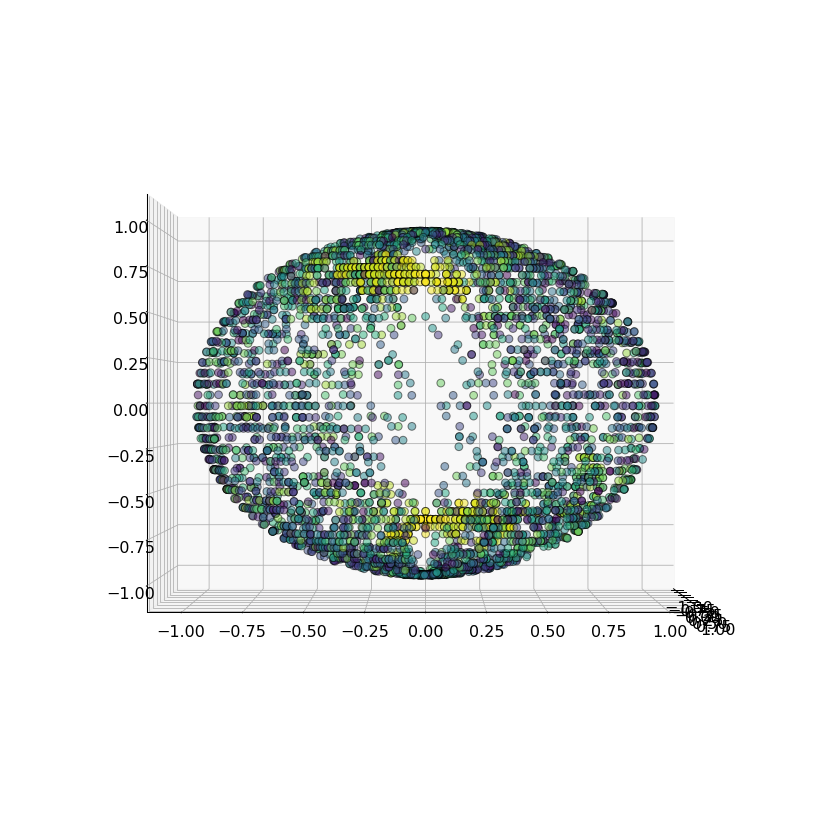

In [48]:
#Max strain value at each time work/plot

iterStartMV = 0 #Iteration start
iterEndMV = 50000 #Iteration end
iterStepMV = 10 #Iteration step
nVertsMV = 100j #n^(1/2) verts in spherical space

iterRangeMV = np.arange(iterStartMV,iterEndMV,iterStepMV) #Create iter array

sV_X, sV_Y, sV_Z, sV_R = strain3DSurfMaxValue(iterRangeMV, iterStepMV, nVertsMV) #sV_# -> strain value array (X,Y,Z,R)

sV_R_Pos = np.array([]) #Initialize empty array

sV_X_Flat = sV_X.reshape((len(sV_X),len(sV_X[0])**2)) #Flatten cord array to 2d array 
sV_Y_Flat = sV_Y.reshape((len(sV_Y),len(sV_Y[0])**2)) #Flatten cord array to 2d array 
sV_Z_Flat = sV_Z.reshape((len(sV_Z),len(sV_Z[0])**2)) #Flatten cord array to 2d array 
sV_R_Flat = sV_R.reshape((len(sV_R),len(sV_R[0])**2)) #Flatten radius array to 2d array 

# display(sV_X.shape)
# display(sV_X_Flat.shape)

sV_R_Pos = np.argmax(sV_R_Flat,axis=1) #Get max R value at each time

# display(sV_R_Pos.shape)
# display(np.expand_dims(sV_R_Pos, axis=1).shape)

sV_X_MV = np.take_along_axis(sV_X_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
sV_Y_MV = np.take_along_axis(sV_Y_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time
sV_Z_MV = np.take_along_axis(sV_Z_Flat, np.expand_dims(sV_R_Pos, axis=1),axis=1) #Get values associated with max R values at each time

sV_XYZ_MV = hstack((sV_X_MV,sV_Y_MV,sV_Z_MV)) #Stack cord arrays 

genScatterPlot(sV_XYZ_MV, norm = True) #Generate 3D scatter plot

#display(sV_X_MV.shape)

<ipython-input-46-88a34a70653a>:2: RuntimeWarning: invalid value encountered in true_divide
  sV_Phi_MV = np.arctan((sV_Y_MV/sV_X_MV))


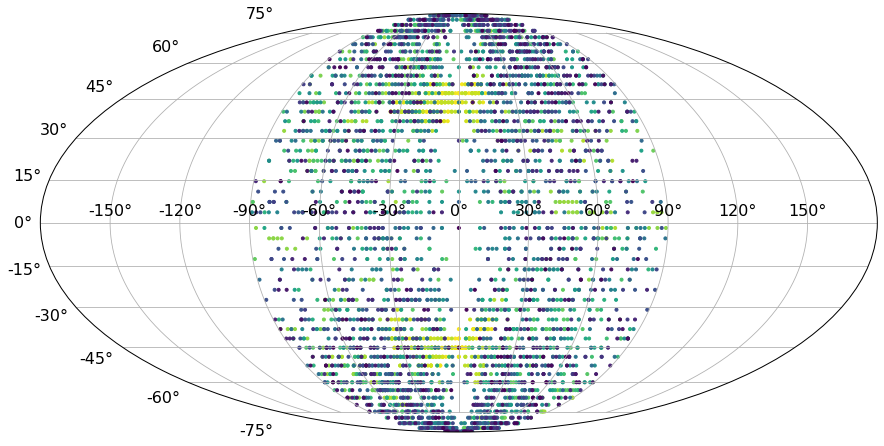

In [46]:
sV_Theta_MV = np.arctan((((sV_X_MV**2+sV_Y_MV**2)**(1/2))/sV_Z_MV))
sV_Phi_MV = np.arctan((sV_Y_MV/sV_X_MV))

#display(np.sum(np.isnan(sV_Phi_MV)))

fig = plt.figure(figsize = (15,15))
plt.subplot(111, projection="mollweide")
#phi = np.linspace(0,np.pi,14)
#theta = np.linspace(0,2*np.pi,14)
plt.scatter(sV_Phi_MV, sV_Theta_MV, marker='.', c = np.arange(len(sV_Theta_MV)), cmap='viridis_r')
plt.grid()

In [32]:
# fig = plt.figure(figsize = (15,15))
# plt.subplot(111, projection="mollweide")
# phi = np.linspace(0,np.pi,100)
# theta = np.linspace(0,2*np.pi,100)
# plt.scatter(phi, theta, marker='.', c = np.arange(len(phi)), cmap='viridis')
# plt.grid()